<a href="https://colab.research.google.com/github/suha98/Analysis-of-Amazon-Bestselling-Books-2009-2019/blob/main/Bestselling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the Data

**Name:** Amazon top 50 Bestselling Books List from 2009 to 2019

The dataset was collected from [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019). I manually added the Gender column and have uploaded my version of the data. 

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Gender
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction,Male
1,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction,Male
2,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6,2017,Non Fiction,Male
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction,Male
4,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction,Male
...,...,...,...,...,...,...,...,...
545,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,Company
546,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2018,Fiction,Company
547,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2019,Fiction,Company
548,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction,Male


In [4]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Gender         0
dtype: int64

In [5]:
print(df['Genre'].unique())
print(df['Year'].unique())

['Fiction' 'Non Fiction']
[2010 2011 2017 2019 2016 2009 2014 2013 2012 2015 2018]


## Analyses

1. Distribution of Male and Female authors in ten years
2. Distribution of Fiction and Non-Fiction Works in 10 Years
3. Correlation between number of reviews and price according to males and females - does more reviews mean higher price?
5. Distribution of Gender and Number of Reviews
6. Distribution of review ratings according to year
7. Does a book name with more words mean higher rating/reviews/price? Is it on the bestseller list for longer?
8. Books that have been on the bestselling list more than once and their characteristics. Did the price go up? Are most of these books fiction or non-fiction? Were most of the writers male or female?



## Calculations

Calculating percentage of male and female bestselling authors

In [7]:
#Making a subset of the dataframe by grouping the rows by gender
df_gender = pd.DataFrame(df.groupby(['Year', 'Gender']).size().reset_index())

#converts the wide-form data to longform
df_gender= df_gender.pivot(index=['Year'], columns=['Gender'], values=0)

#creating the column for percentages
df_gender['female %'] = (df_gender['Female']/50)*100
df_gender['male %'] = (df_gender['Male']/50)*100


df_gender

Gender,Company,Female,Male,female %,male %
Year,,,,,
2009,2,16,32,32.0,64.0
2010,3,11,36,22.0,72.0
2011,3,16,31,32.0,62.0
2012,3,19,28,38.0,56.0
2013,4,14,32,28.0,64.0
2014,8,13,29,26.0,58.0
2015,8,17,25,34.0,50.0
2016,7,24,19,48.0,38.0
2017,5,16,29,32.0,58.0


## Visualizations


*Distribution of Male and Female authors in ten years*


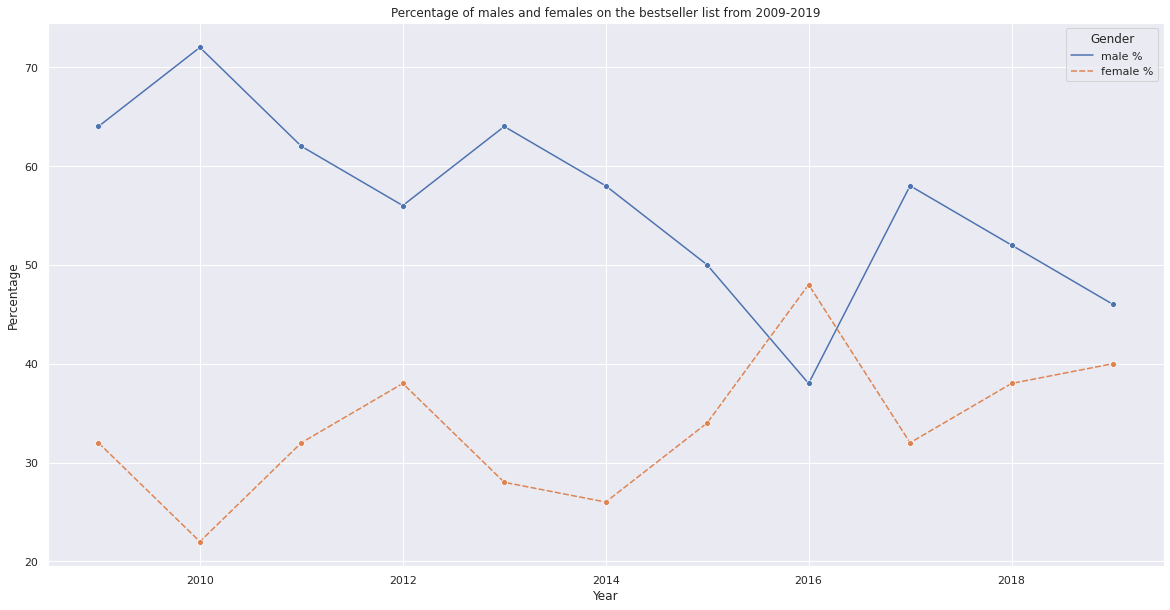

In [9]:
sns.set_theme()
plt.figure(figsize=(20,10))
plt.title('Percentage of males and females on the bestseller list from 2009-2019')
plt.xlabel('Year')
plt.ylabel('Percentage')
sns.lineplot(data = df_gender[['male %', 'female %']], marker = 'o')

#### Fiction and non-fiction in 10 years

- More non-fiction books than fiction in most years
- Number of male non-fiction writers decreased
- Number of female non-fiction writers increased
- Books with company authors were mostly non-fiction
- Number of male fiction writers remained relatively constant whereas the number of females decreased

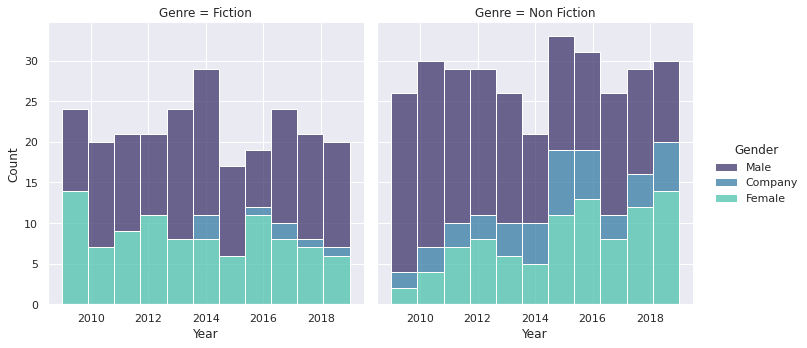

In [52]:
sns.set_theme()
sns.displot(df, x="Year", hue = 'Gender', palette = 'mako', multiple = 'stack',col = 'Genre')


#### User Rating of Amazon Bestselling Books by Year

With time, it appears that books with a higher user rating became bestsellers.

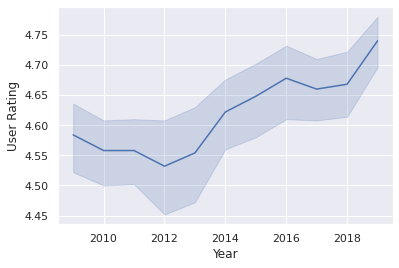

In [49]:
sns.set_theme()
#sns.displot(data=df, y="User Rating", x='Price',col = 'Year', kind='hist')
sns.lineplot(data=df, x="Year", y='User Rating')



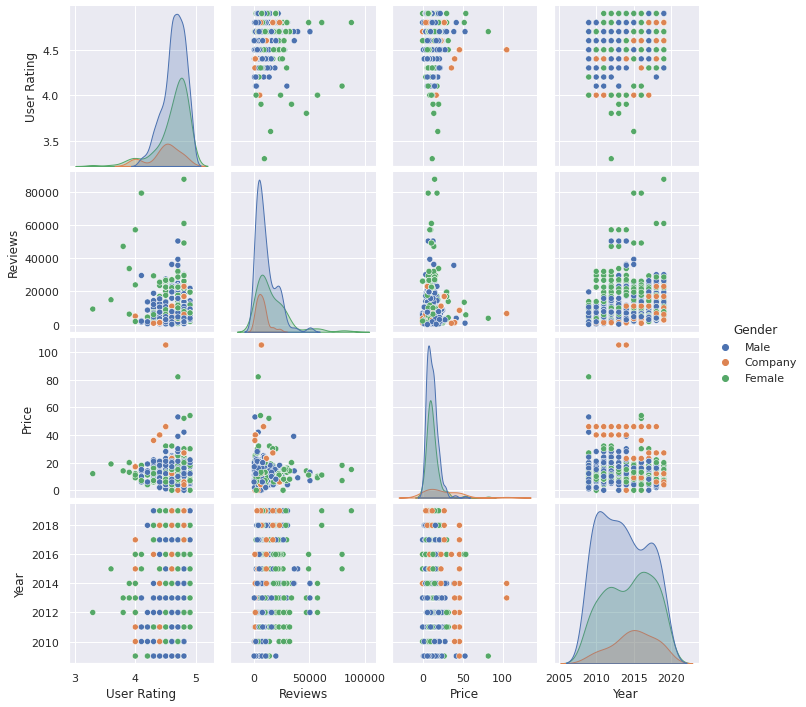

In [23]:
sns.pairplot(df, hue="Gender")


In [ ]:
#Making a subset of the dataframe by grouping the rows by gender
df_genre = pd.DataFrame(df.groupby(['Year', 'Genre']).size().reset_index())

#converts the wide-form data to longform
df_genre= df_genre.pivot(index=['Year'], columns=['Genre'], values=0)

#creating the column for percentages
#df_gender['female %'] = (df_gender['Female']/50)*100
#df_gender['male %'] = (df_gender['Male']/50)*100


df_genre

Genre,Fiction,Non Fiction
Year,,
2009,24,26
2010,20,30
2011,21,29
2012,21,29
2013,24,26
2014,29,21
2015,17,33
2016,19,31
2017,24,26


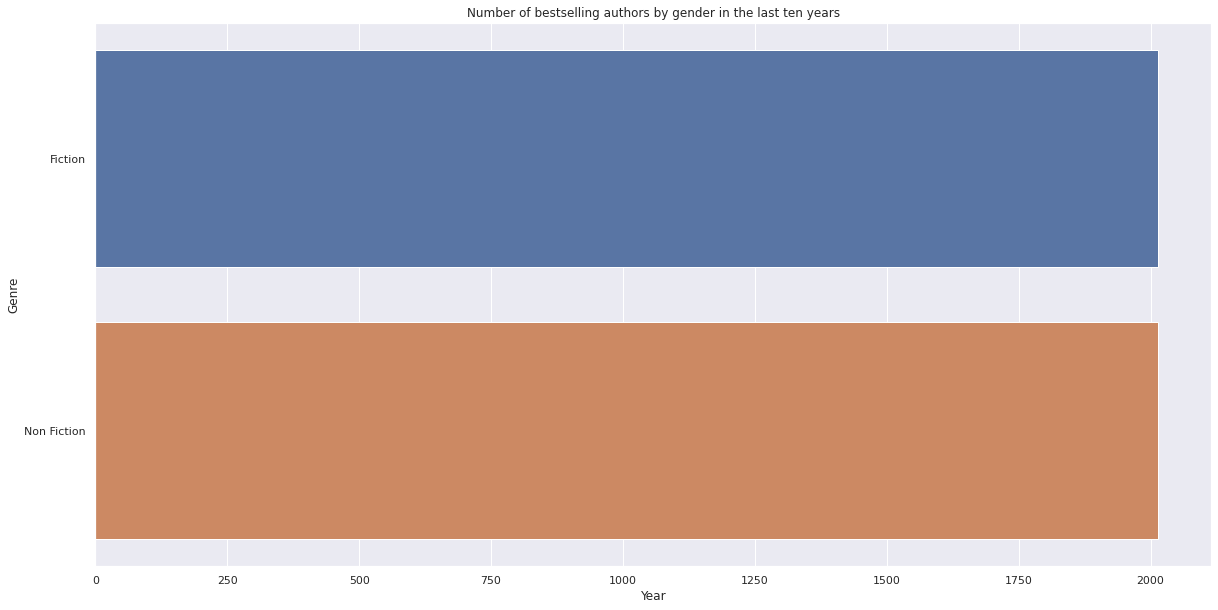

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Number of bestselling authors by gender in the last ten years')
plt.xlabel('Year')
plt.ylabel('Frequency')
sns.barplot(x='Year', y='Genre', data=df)

In [ ]:
df_gender['Male'] = -1*df_gender['Male']

In [ ]:
df_gender['Year'] = df_gender['Year'].astype(str)



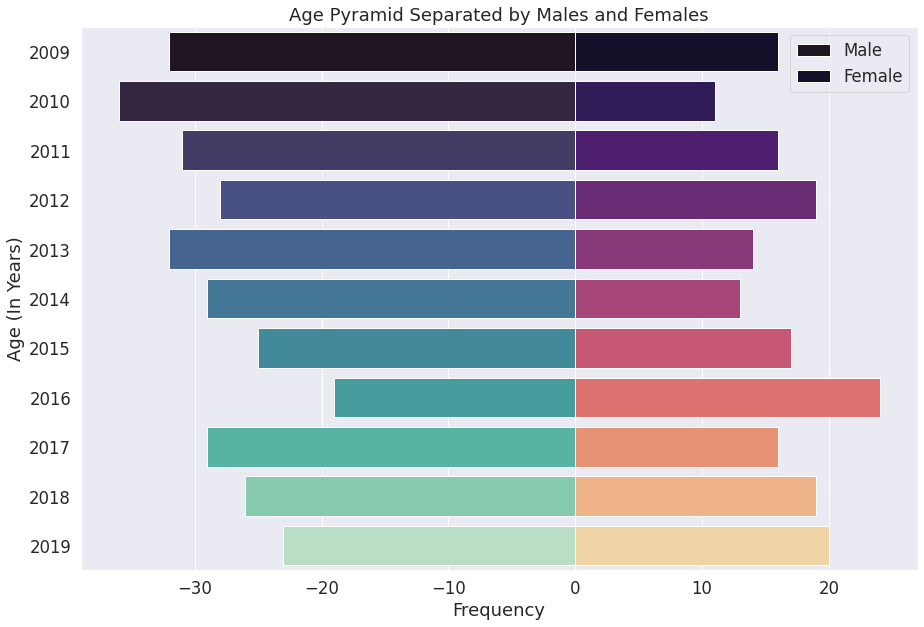

In [ ]:
sns.set_theme()
sns.set(font_scale = 1.5)

plt.figure(figsize=(15, 10))
plt.title('Age Pyramid Separated by Males and Females')

age_pyramid = sns.barplot(x='Male', y='Year', data=df_gender,palette= 'mako', label='Male')
age_pyramid = sns.barplot(x='Female', y='Year', data=df_gender, palette = 'magma', label='Female')

plt.xlabel('Frequency')
plt.ylabel('Age (In Years)')

age_pyramid.legend()
